# 오토 인코더(Auto-Encoder, AE):
GAN이 세상에 존재하지 않는 완전 가상의 것을 만든다면 AE는 초점이 흐리고 윤곽이 불투명하지만 특징을 유추할 수 있는 것들이 모여 이미지가 만들어진다.


> 아직 데이터가 충분하지 않은 분야게서 사용가능하다. GAN은 가상의 것을 넣으면 현실적이지 않은 결과를 예상 가능하지만 AE는 부족한 데이터 수를 늘려주는 효과를 기대할 수 있다.




In [1]:
from keras.models import Sequential, Model
from keras.layers import Input, Dense, Flatten, Reshape, Conv2D, UpSampling2D, MaxPooling2D
from keras.datasets import mnist

import matplotlib.pyplot as plt
import numpy as np

In [3]:
(X_train, _), (X_test, _) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')/255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')/255

# 생성자 모델
autoencoder = Sequential()

# 인코딩
autoencoder.add(Conv2D(16, kernel_size=3, padding='same', input_shape=(28,28,1), activation='relu'))
autoencoder.add(MaxPooling2D(pool_size=2, padding='same'))
autoencoder.add(Conv2D(8, kernel_size=3, activation='relu', padding='same'))
autoencoder.add(MaxPooling2D(pool_size=2, padding='same'))
autoencoder.add(Conv2D(8, kernel_size=3, strides=2, activation='relu', padding='same'))

# 디코딩
autoencoder.add(Conv2D(8, kernel_size=3, activation='relu', padding='same'))
autoencoder.add(UpSampling2D())
autoencoder.add(Conv2D(8, kernel_size=3, activation='relu', padding='same'))
autoencoder.add(UpSampling2D())
autoencoder.add(Conv2D(16, kernel_size=3, activation='relu'))
autoencoder.add(UpSampling2D())
autoencoder.add(Conv2D(1, kernel_size=3, activation='sigmoid', padding='same'))

#
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(X_train, X_train, epochs=50, batch_size=120, validation_data=(X_test, X_test))

Epoch 1/50
500/500 [==============================] - 105s 209ms/step - loss: 0.2049 - val_loss: 0.1332
Epoch 2/50
500/500 [==============================] - 88s 176ms/step - loss: 0.1245 - val_loss: 0.1163
Epoch 3/50
500/500 [==============================] - 96s 192ms/step - loss: 0.1135 - val_loss: 0.1091
Epoch 4/50
500/500 [==============================] - 97s 194ms/step - loss: 0.1080 - val_loss: 0.1049
Epoch 5/50
500/500 [==============================] - 123s 247ms/step - loss: 0.1042 - val_loss: 0.1012
Epoch 6/50
500/500 [==============================] - 120s 240ms/step - loss: 0.1013 - val_loss: 0.0988
Epoch 7/50
500/500 [==============================] - 87s 175ms/step - loss: 0.0992 - val_loss: 0.0971
Epoch 8/50
500/500 [==============================] - 88s 176ms/step - loss: 0.0975 - val_loss: 0.0955
Epoch 9/50
500/500 [==============================] - 88s 175ms/step - loss: 0.0962 - val_loss: 0.0944
Epoch 10/50
500/500 [==============================] - 89s 178ms/step 

313/313 [==============================] - 6s 18ms/step


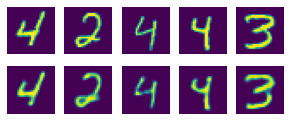

In [8]:
# 학습된 결과를 출력
random_test = np.random.randint(X_test.shape[0], size=5)

# 테스트할 이미지를 랜덤으로 호출
ae_imgs = autoencoder.predict(X_test) # 앞서 만든 AE 모델에 넣음

plt.figure(figsize=(7, 2)) # 출력 이미지 크기

for i, image_idx in enumerate(random_test):
  # 랜덤으로 이미지 나열
  ax = plt.subplot(2, 7, i+1)
  # 테스트할 이미지 출력
  plt.imshow(X_test[image_idx].reshape(28, 28))
  ax.axis('off')
  ax = plt.subplot(2, 7, 7 + i + 1)
  # 오토인코딩 결과를 다음 열에 입력
  plt.imshow(ae_imgs[image_idx].reshape(28, 28))
  ax.axis('off')
plt.show()